In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls '/content/drive/MyDrive'

'archive (6).zip'       Final_grade_calculator_2.xlsx	     test
'Colab Notebooks'      'How to get started with Drive.pdf'  'Thoybur Samir-Rahman CV.gdoc'
 data		        Resume.gdoc
 fer2013_balanced.zip   SavedModels


In [ ]:
# Unzip the archive file
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/archive (6).zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dataset/ck+')

!ls /content/dataset/fer2013/

ls: cannot access '/content/dataset/fer2013/': No such file or directory


In [ ]:
!ls '/content/drive/MyDrive/Colab Notebooks'

 archive.zip		      'Machine Learning for Everybody -EP1'
 Fer2013_year3_dataset.ipynb  'pneumonia_detection-V2_2 (1).ipynb'
 ferv2.ipynb		       pneumonia_detection-V2_2.ipynb
 HelloWorld_MNIST.ipynb        pneumonia_detection_V2_2.ipynb
'Machine Learning -EP1'        year3Final.ipynb


In [ ]:
!mkdir -p '/content/dataset/fer2013'

In [ ]:
# Unzip the archive file
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/archive.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dataset/fer2013')

!ls /content/dataset/fer2013/

test  train


In [ ]:
import os
import shutil

def combine_datasets(ckplus_path, fer2013_path, output_path):
    emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

    # Combine train datasets
    for emotion in emotions:
        ckplus_train_path = os.path.join(ckplus_path, 'train', emotion)
        fer2013_train_path = os.path.join(fer2013_path, 'train', emotion)
        output_train_path = os.path.join(output_path, 'train', emotion)

        # Create the output directory for the emotion in the combined dataset
        os.makedirs(output_train_path, exist_ok=True)

        # Copy images from CK+ train set
        for file_name in os.listdir(ckplus_train_path):
            shutil.copy(os.path.join(ckplus_train_path, file_name), output_train_path)

        # Copy images from FER2013 train set
        for file_name in os.listdir(fer2013_train_path):
            shutil.copy(os.path.join(fer2013_train_path, file_name), output_train_path)

    # Combine test datasets
    for emotion in emotions:
        ckplus_test_path = os.path.join(ckplus_path, 'test', emotion)
        fer2013_test_path = os.path.join(fer2013_path, 'test', emotion)
        output_test_path = os.path.join(output_path, 'test', emotion)

        # Create the output directory for the emotion in the combined dataset
        os.makedirs(output_test_path, exist_ok=True)

        # Copy images from CK+ test set
        for file_name in os.listdir(ckplus_test_path):
            shutil.copy(os.path.join(ckplus_test_path, file_name), output_test_path)

        # Copy images from FER2013 test set
        for file_name in os.listdir(fer2013_test_path):
            shutil.copy(os.path.join(fer2013_test_path, file_name), output_test_path)

# Example usage:
ckplus_dataset_path = '/content/dataset/ck+/ck+ new'
fer2013_dataset_path = '/content/dataset/fer2013'
combined_dataset_output_path = '/content/dataset/combined'

combine_datasets(ckplus_dataset_path, fer2013_dataset_path, combined_dataset_output_path)

In [ ]:
!ls '/content/dataset/combined/train'

angry  disgust	fear  happy  neutral  sad  surprise


In [ ]:
emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
train_data_path = '/content/dataset/combined/train'
test_data_path = '/content/dataset/combined/test'


In [ ]:
emotions_distribution = {}
for emo in emotions:
  count = 0
  count = len(os.listdir(os.path.join(train_data_path, emo)))
  emotions_distribution[emo] = count
emotions_distribution

{'angry': 4089,
 'disgust': 561,
 'fear': 4149,
 'happy': 7359,
 'neutral': 5003,
 'sad': 4888,
 'surprise': 3344}

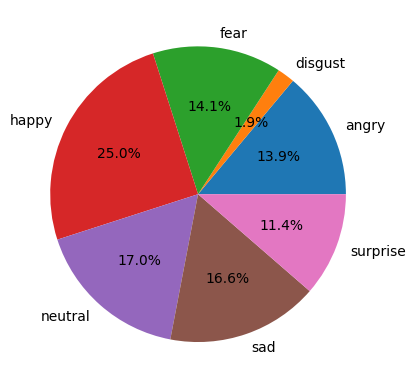

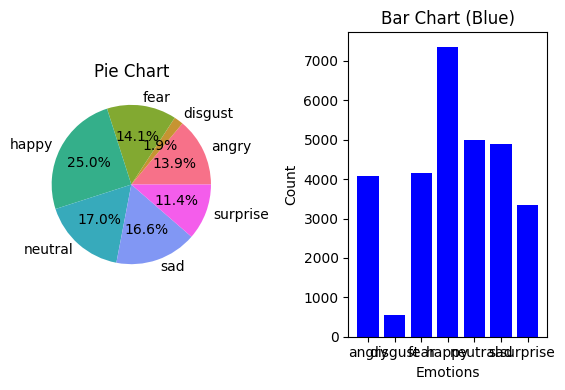

In [ ]:
from matplotlib import pyplot as plt

plt.pie(list(emotions_distribution.values()),
        labels = list(emotions_distribution.keys()),
        autopct = '%1.1f%%')
plt.show()

from matplotlib import pyplot as plt
import seaborn as sns

# Use Seaborn color palette for a set of distinct colors
colors = sns.color_palette('husl', n_colors=len(emotions_distribution))

# Pie chart
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.pie(list(emotions_distribution.values()), labels=list(emotions_distribution.keys()), autopct='%1.1f%%', colors=colors)
plt.title('Pie Chart')

# Bar chart in blue
plt.subplot(1, 4, 2)
plt.bar(emotions_distribution.keys(), emotions_distribution.values(), color='blue')
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Bar Chart (Blue)')

plt.tight_layout()
plt.show()

# 2. Fixing imbalanced dataset

In [ ]:

# !rm -rf '/content/dataset/fer2013/train/disgust/'
# !rm -rf '/content/dataset/fer2013/test/disgust/'

!ls '/content/dataset/fer2013/train/'
!ls '/content/dataset/fer2013/test/'

angry  disgust	fear  happy  neutral  sad  surprise
angry  disgust	fear  happy  neutral  sad  surprise


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from PIL import Image
import os

In [ ]:
img_gen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [ ]:
def preparing_data(path):
    img_data = []
    img_sze = (224, 244)

    #looping over every Img resize and convert it to an array and append it to list
    for img_name in os.listdir(path):
        img_path = os.path.join(path, img_name)

        img = Image.open(img_path).convert('RGB')
        img = img.resize(img_sze)
        img = np.array(img)

        img_data.append(img)

    return np.array(img_data)

In [ ]:
def generating_data(data, path_2_save, prefix, batch_size, batches_number):
    """
    PARAMS::
    data: a numpy array that contains all your images preprocessed
    path_2_save: folder destination that you will save the data on
    prefix: the prefix name of the generated files
    batch_size: how many images to preduce in every iteration
    batches_number: How many batches you wanna generate
    -> no_imgs = batch_size * batches_number

    RETURNS::
    it saves the files on to the destination path
    """
    count = 0
    for batch in img_gen.flow(data, batch_size=batch_size,
                              save_to_dir=path_2_save,
                              save_prefix=prefix, save_format='jpeg'):

        if count > batches_number:
            break

        count += 1

In [ ]:
!mkdir -p /content/dataset/generated/surprise

In [ ]:
generated_path = '/content/dataset/generated/surprise'
surprise_path = '/content/dataset/combined/train/surprise'
surprise_prepared = preparing_data(path=surprise_path)
print(surprise_prepared.shape)

(3344, 244, 224, 3)


In [ ]:
generating_data(surprise_prepared, generated_path, prefix='gen', batch_size=32, batches_number=80)

In [ ]:
!ls /content/dataset/generated/surprise | wc -l

2624


In [ ]:
!mv /content/dataset/generated/surprise/* /content/dataset/combined/train/surprise/.

In [ ]:
!ls /content/dataset/combined/train/surprise/ | wc -l

5968


In [ ]:
del surprise_prepared
del surprise_path

In [ ]:
!rmdir /content/dataset/generated/surprise

In [ ]:

emotions_distribution

{'angry': 4089,
 'disgust': 561,
 'fear': 4149,
 'happy': 7359,
 'neutral': 5003,
 'sad': 4888,
 'surprise': 3344}

In [ ]:
angry_prepared = preparing_data('/content/dataset/combined/train/angry')

In [ ]:
generating_data(angry_prepared,
                '/content/dataset/combined/train/angry',
                prefix='gen',
                batch_size=20,
                batches_number=100)

In [ ]:
!ls /content/dataset/combined/train/angry/ | wc -l

6129


In [ ]:
del angry_prepared

In [ ]:
fear_prepared = preparing_data('/content/dataset/combined/train/fear')

generating_data(fear_prepared,
                '/content/dataset/combined/train/fear',
                prefix='gen',
                batch_size=20,
                batches_number=40)

In [ ]:
!ls /content/dataset/combined/train/fear | wc -l

4989


In [ ]:
del fear_prepared

In [ ]:
sad_prepared = preparing_data('/content/dataset/combined/train/sad')

generating_data(sad_prepared,
                '/content/dataset/combined/train/sad',
                prefix='gen',
                batch_size=5,
                batches_number=5)
!ls /content/dataset/combined/train/sad/ | wc -l

4923


In [ ]:
del sad_prepared

In [ ]:
neutral_prepared = preparing_data('/content/dataset/combined/train/neutral')

generating_data(neutral_prepared,
                '/content/dataset/combined/train/neutral',
                prefix='gen',
                batch_size=10,
                batches_number=100)
!ls /content/dataset/combined/train/neutral | wc -l

In [ ]:
disgust_prepared = preparing_data('/content/dataset/combined/train/disgust')

generating_data(disgust_prepared,
                '/content/dataset/combined/train/disgust',
                prefix='gen',
                batch_size=5,
                batches_number=10)
!ls /content/dataset/combined/train/disgust | wc -l

4666


In [ ]:
del disgust_prepared

In [ ]:
data_path = '/content/dataset/combined/train'
emo_dist = {}

for dir in os.listdir(data_path):
  imgs_count = len(os.listdir(os.path.join(data_path, dir)))
  emo_dist[dir] = imgs_count

  print(f"numer of imgs in the {dir} category is {imgs_count}")

numer of imgs in the disgust category is 4666
numer of imgs in the angry category is 6129
numer of imgs in the fear category is 4989
numer of imgs in the neutral category is 5003
numer of imgs in the happy category is 7359
numer of imgs in the sad category is 4923
numer of imgs in the surprise category is 5968


In [ ]:
emo_dist

{'disgust': 4666,
 'angry': 6129,
 'fear': 4989,
 'neutral': 5003,
 'happy': 7359,
 'sad': 4923,
 'surprise': 5968}

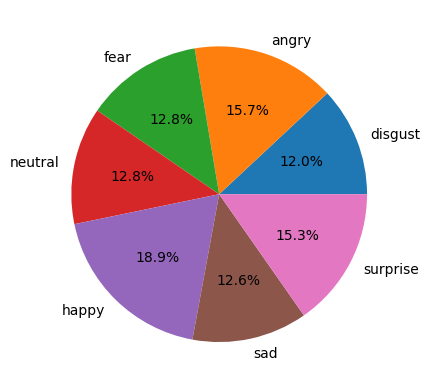

In [ ]:
plt.pie(list(emo_dist.values()),
        labels = list(emo_dist.keys()),
        autopct = '%1.1f%%')
plt.show()

In [ ]:
zf = zipfile.ZipFile("combined_balanced_dataset.zip", "w")
for dirname, subdirs, files in os.walk('/content/dataset/combined'):
    zf.write(dirname)
    for filename in files:
        zf.write(os.path.join(dirname, filename))
zf.close()

In [ ]:
!cp /content/combined_balanced_dataset.zip /content/drive/MyDrive/data

In [ ]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
nltk.download('wordnet')

In [ ]:
from nltk.corpus import wordnet

def antonyms_for(word):
    antonyms = set()
    for ss in wordnet.synsets(word):
        for lemma in ss.lemmas():
            any_pos_antonyms = [antonym.name() for antonym in lemma.antonyms()]
            antonyms.update(any_pos_antonyms)
    return antonyms

print(antonyms_for("good"))


{'evilness', 'evil', 'bad', 'badness', 'ill'}
